In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression as linreg
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as r2
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier as KN
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cluster import KMeans as KM
from mpl_toolkits.mplot3d import axes3d

In [3]:
iris = pd.read_csv('Iris.csv', names =  ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'name'])
list(iris)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'name']

In [4]:
print(iris.head(5))

   sepal_length  sepal_width  petal_length  petal_width         name
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [5]:
print(iris.name.unique())
setosa = iris[iris.name == 'Iris-setosa'].reset_index(drop=True)
print(setosa.head(2))
versicolor = iris[iris.name == 'Iris-versicolor'].reset_index(drop=True)
print(versicolor.head(2))
virginica = iris[iris.name == 'Iris-virginica'].reset_index(drop=True)
print(virginica.head(2))

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
   sepal_length  sepal_width  petal_length  petal_width         name
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
   sepal_length  sepal_width  petal_length  petal_width             name
0           7.0          3.2           4.7          1.4  Iris-versicolor
1           6.4          3.2           4.5          1.5  Iris-versicolor
   sepal_length  sepal_width  petal_length  petal_width            name
0           6.3          3.3           6.0          2.5  Iris-virginica
1           5.8          2.7           5.1          1.9  Iris-virginica


# Functions

In [6]:
def mean(x):
    mu = [x[0].mean(), x[1].mean(), x[2].mean(), x[3].mean()]
    mean = [ '%.3f' % elem for elem in mu]
    mean = [float(x) for x in mean]
    return mean
def std(x):
    s = [x[0].std(), x[1].std(), x[2].std(), x[3].std()]
    std = [ '%.3f' % elem for elem in s]
    std = [float(x) for x in std]
    return std
def minimum(x):
    minimum = [x[0].min(), x[1].min(), x[2].min(), x[3].min()]
    return minimum
def maximum(x):
    maximum = [x[0].max(), x[1].max(), x[2].max(), x[3].max()]
    return maximum

# Analyzing Iris Setosa

**Mean**

In [7]:
setosa_s_l_mean = round(setosa['sepal_length'].mean(), 3)
setosa_s_w_mean = round(setosa['sepal_width'].mean(), 3)
setosa_p_l_mean = round(setosa['petal_length'].mean(), 3)
setosa_p_w_mean = round(setosa['petal_width'].mean(), 3)
print(setosa_s_l_mean, setosa_s_w_mean, setosa_p_l_mean, setosa_p_w_mean)


5.006 3.428 1.462 0.246


**Standard Deviation**

In [8]:
setosa_s_l_std = round(setosa['sepal_length'].std(), 3)
setosa_s_w_std = round(setosa['sepal_width'].std(), 3)
setosa_p_l_std = round(setosa['petal_length'].std(), 3)
setosa_p_w_std = round(setosa['petal_width'].std(), 3)
print(setosa_s_l_std, setosa_s_w_std, setosa_p_l_std, setosa_p_w_std)

0.352 0.379 0.174 0.105


** Min & Max **

In [9]:
setosa_s_l_min = round(setosa['sepal_length'].min(), 3)
setosa_s_w_min = round(setosa['sepal_width'].min(), 3)
setosa_p_l_min = round(setosa['petal_length'].min(), 3)
setosa_p_w_min = round(setosa['petal_width'].min(),3)
setosa_s_l_max = round(setosa['sepal_length'].max(),3)
setosa_s_w_max = round(setosa['sepal_width'].max(),3)
setosa_p_l_max = round(setosa['petal_length'].max(), 3)
setosa_p_w_max = round(setosa['petal_width'].max(), 3)
print('min')
print(setosa_s_l_min, setosa_s_w_min, setosa_p_l_min, setosa_p_l_min)
print('max')
print(setosa_s_l_max,setosa_s_w_max,setosa_p_l_max,setosa_p_w_max)

min
4.3 2.3 1.0 1.0
max
5.8 4.4 1.9 0.6


** Summary **

In [10]:
dic1 = {' ': ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'],
         'Min': [round(setosa['sepal_length'].min(), 2), round(setosa['sepal_width'].min(), 2), round(setosa['petal_length'].min(), 2), round(setosa['petal_width'].min(), 2)],
         'Max': [round(setosa['sepal_length'].max(), 2), round(setosa['sepal_width'].max(), 2), round(setosa['petal_length'].max(), 2), round(setosa['petal_width'].max(), 2)],
         'Mean': [round(setosa['sepal_length'].mean(), 2), round(setosa['sepal_width'].mean(), 2), round(setosa['petal_length'].mean(), 2), round(setosa['petal_width'].mean(), 2)],
         'STD': [round(setosa['sepal_length'].std(), 2), round(setosa['sepal_width'].std(), 2), round(setosa['petal_length'].std(), 2), round(setosa['petal_width'].std(), 2)] } 
summarysetosa = pd.DataFrame.from_dict(dic1)
print(summarysetosa)

                 Min  Max  Mean   STD
0  Sepal Length  4.3  5.8  5.01  0.35
1   Sepal Width  2.3  4.4  3.43  0.38
2  Petal Length  1.0  1.9  1.46  0.17
3   Petal Width  0.1  0.6  0.25  0.11


# Analyzing Iris Versicolor

In [11]:
v_data = np.array([versicolor['sepal_length'], versicolor['sepal_width'], versicolor['petal_length'], versicolor['petal_width']])

** Mean **

In [12]:
print (mean(v_data))

[5.936, 2.77, 4.26, 1.326]


** Standard Deviation **

In [13]:
print(std(v_data))

[0.511, 0.311, 0.465, 0.196]


** Maximum **

In [14]:
print (maximum(v_data))

[7.0, 3.4, 5.1, 1.8]


** Minimum **

In [15]:
print (minimum(v_data))

[4.9, 2.0, 3.0, 1.0]


** Summary **

In [16]:
dic2 = {' ': ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'],
         'Min': [round(versicolor['sepal_length'].min(), 2), round(versicolor['sepal_width'].min(), 2), round(versicolor['petal_length'].min(), 2), round(versicolor['petal_width'].min(), 2)],
         'Max': [round(versicolor['sepal_length'].max(), 2), round(versicolor['sepal_width'].max(), 2), round(versicolor['petal_length'].max(), 2), round(versicolor['petal_width'].max(), 2)],
         'Mean': [round(versicolor['sepal_length'].mean(), 2), round(versicolor['sepal_width'].mean(), 2), round(versicolor['petal_length'].mean(), 2), round(versicolor['petal_width'].mean(), 2)],
         'STD': [round(versicolor['sepal_length'].std(), 2), round(versicolor['sepal_width'].std(), 2), round(versicolor['petal_length'].std(), 2), round(versicolor['petal_width'].std(), 2)] } 
summaryversicolor = pd.DataFrame.from_dict(dic2)
print(summaryversicolor)

                 Min  Max  Mean   STD
0  Sepal Length  4.9  7.0  5.94  0.52
1   Sepal Width  2.0  3.4  2.77  0.31
2  Petal Length  3.0  5.1  4.26  0.47
3   Petal Width  1.0  1.8  1.33  0.20


# Analyzing Iris Virginica

In [17]:
vi_data = np.array([virginica['sepal_length'], virginica['sepal_width'], virginica['petal_length'], virginica['petal_width']])

** Mean **

In [18]:
print(mean(vi_data))

[6.588, 2.974, 5.552, 2.026]


** Standard Deviation **

In [19]:
print(std(vi_data))

[0.629, 0.319, 0.546, 0.272]


** Minimum **

In [20]:
print(minimum(vi_data))

[4.9, 2.2, 4.5, 1.4]


** Maximum **

In [21]:
print(maximum(vi_data))

[7.9, 3.8, 6.9, 2.5]


** Summary **

In [22]:
dic3 = {' ': ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'],
         'Min': [round(virginica['sepal_length'].min(), 2), round(virginica['sepal_width'].min(), 2), round(virginica['petal_length'].min(), 2), round(virginica['petal_width'].min(), 2)],
         'Max': [round(virginica['sepal_length'].max(), 2), round(virginica['sepal_width'].max(), 2), round(virginica['petal_length'].max(), 2), round(virginica['petal_width'].max(), 2)],
         'Mean': [round(virginica['sepal_length'].mean(), 2), round(virginica['sepal_width'].mean(), 2), round(virginica['petal_length'].mean(), 2), round(virginica['petal_width'].mean(), 2)],
         'STD': [round(virginica['sepal_length'].std(), 2), round(virginica['sepal_width'].std(), 2), round(virginica['petal_length'].std(), 2), round(virginica['petal_width'].std(), 2)] } 
summaryvirginica = pd.DataFrame.from_dict(dic3)
print(summaryvirginica)

                 Min  Max  Mean   STD
0  Sepal Length  4.9  7.9  6.59  0.64
1   Sepal Width  2.2  3.8  2.97  0.32
2  Petal Length  4.5  6.9  5.55  0.55
3   Petal Width  1.4  2.5  2.03  0.27


# Aggregate Summary

In [23]:
dic = {' ': ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'],
         'Min': [round(iris['sepal_length'].min(), 2), round(iris['sepal_width'].min(), 2), round(iris['petal_length'].min(), 2), round(iris['petal_width'].min(), 2)],
         'Max': [round(iris['sepal_length'].max(), 2), round(iris['sepal_width'].max(), 2), round(iris['petal_length'].max(), 2), round(iris['petal_width'].max(), 2)],
         'Mean': [round(iris['sepal_length'].mean(), 2), round(iris['sepal_width'].mean(), 2), round(iris['petal_length'].mean(), 2), round(iris['petal_width'].mean(), 2)],
         'STD': [round(iris['sepal_length'].std(), 2), round(iris['sepal_width'].std(), 2), round(iris['petal_length'].std(), 2), round(iris['petal_width'].std(), 2)] } 
summary = pd.DataFrame.from_dict(dic)
print(summary)

                 Min  Max  Mean   STD
0  Sepal Length  4.3  7.9  5.84  0.83
1   Sepal Width  2.0  4.4  3.06  0.44
2  Petal Length  1.0  6.9  3.76  1.77
3   Petal Width  0.1  2.5  1.20  0.76


# General Visualizations

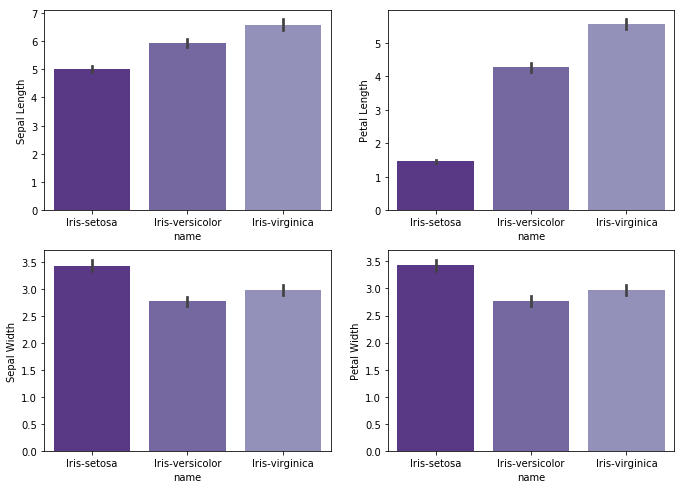

<Figure size 432x288 with 0 Axes>

In [24]:
fig, axes = plt.subplots(2,2)
sns.set_palette('Purples_r')
ax1 = sns.barplot(data=iris, x='name', y = 'sepal_length', orient = 'v', ax=axes[0,0])
ax1.set(ylabel = 'Sepal Length')
ax2 = sns.barplot(data=iris, x='name', y = 'petal_length', orient = 'v', ax=axes[0,1])
ax2.set(ylabel = 'Petal Length')
ax3 = sns.barplot(data=iris, x='name', y = 'sepal_width', orient = 'v', ax=axes[1,0])
ax3.set(ylabel = 'Sepal Width')
ax4 = sns.barplot(data=iris, x='name', y = 'sepal_width', orient = 'v', ax=axes[1,1])
ax4.set(ylabel = 'Petal Width')
fig.set_size_inches(10, 7)
plt.subplots_adjust(right=1, top=1)
plt.show()
plt.savefig('BarCharts.png')

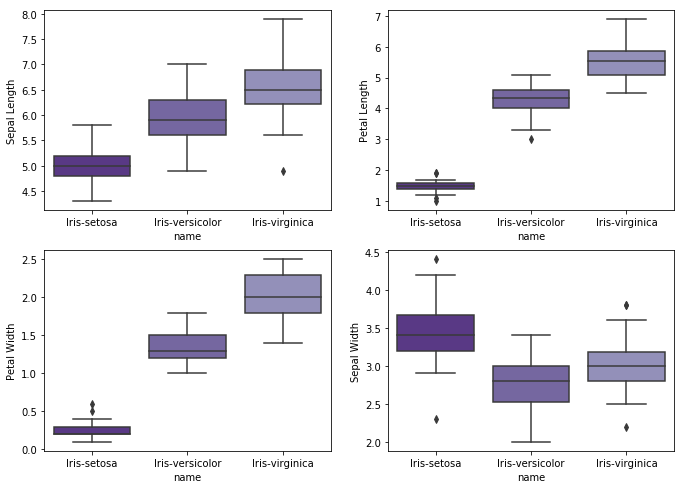

<Figure size 432x288 with 0 Axes>

In [25]:
fig, axes = plt.subplots(2, 2)
sns.set_palette('Purples_r')
ax1 = sns.boxplot(data=iris, x='name', y = 'sepal_length',  orient='v' , ax=axes[0,0])
ax1.set(ylabel = 'Sepal Length')
ax2 = sns.boxplot(data=iris, x='name', y = 'petal_length',  orient='v' , ax=axes[0, 1])
ax2.set(ylabel = 'Petal Length')
ax3 = sns.boxplot(data=iris, x='name', y = 'sepal_width', orient='v' , ax=axes[1, 1])
ax3.set(ylabel = 'Sepal Width')
ax4 = sns.boxplot(data=iris, x='name', y = 'petal_width', orient='v' , ax=axes[1, 0])
ax4.set(ylabel = 'Petal Width')
fig.set_size_inches(10, 7)
plt.subplots_adjust(right=1, top=1)
plt.show()
plt.savefig('Boxplot.png')

# Hypothesis Testing

** Hypothesis #1 **

Sepal length mean of virginica is greater than the sepal length mean of versicolor.

**Null Hypothesis** : Mu (viriginica) <= Mu (versicolor)
**Alternative Hypothesis** : Mu (virginica) > Mu (versicolor)

In [26]:
slvirginica = virginica['sepal_length']
slversicolor = versicolor['sepal_length']
print(round(slvirginica.mean(), 3), '= virginica mean')
print(slversicolor.mean(), '= versicolor mean')
print(round(slvirginica.std(), 3), '= virginica std')
print(round(slversicolor.std(), 3), '= versicolor std')
t, p = stats.ttest_ind(slvirginica, slversicolor)
print('P value is equal to:', p)
if p < 0.05:
    print('NULL REJECTED!')

6.588 = virginica mean
5.936 = versicolor mean
0.636 = virginica std
0.516 = versicolor std
P value is equal to: 1.7248563024547942e-07
NULL REJECTED!


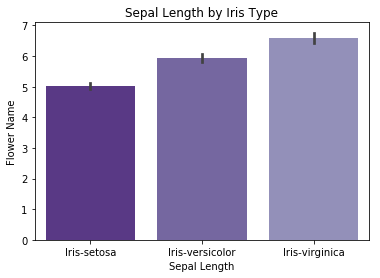

In [27]:
sns.set_palette('Purples_r')
sns.barplot(data=iris, x='name', y = 'sepal_length')
plt.ylabel('Flower Name')
plt.xlabel('Sepal Length')
plt.title('Sepal Length by Iris Type')
plt.show()

** NULL HYPOTHESIS #1 REJECTED **

** HYPOTHESIS #2 **

**Null Hypothesis** : There is no correlation between sepal width and sepal length. **Alternative Hypothesis** : There is correlation between sepal width and sepal length.

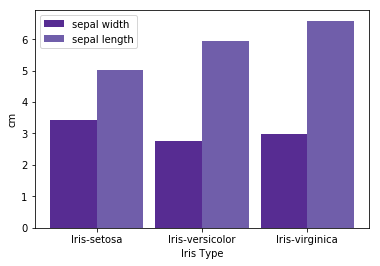

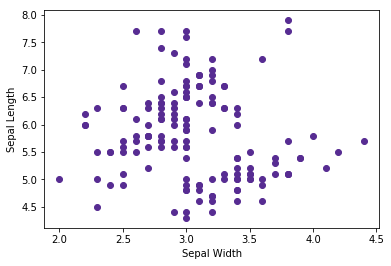

In [28]:
x1 = [1, 2.8, 4.6]
x2 = [1.8, 3.6, 5.4]
x= []
for i in range(3):
    x.append((x1[i]+x2[i])/2)
x_ticks = [iris['name'].unique()]
y1 = [setosa['sepal_width'].mean(), versicolor['sepal_width'].mean(), virginica['sepal_width'].mean()]
y2 = [setosa['sepal_length'].mean(), versicolor['sepal_length'].mean(), virginica['sepal_length'].mean()]
axis = plt.subplot()
plt.bar(x1, y1)
plt.bar(x2, y2)
axis.set_xticks(x)
axis.set_xticklabels(iris['name'].unique())
plt.legend(['sepal width', 'sepal length'])
plt.xlabel('Iris Type')
plt.ylabel('cm')
plt.show()
plt.close('all')
plt.plot(iris.sepal_width, iris.sepal_length, 'o')
plt.xlabel('Sepal Width')
plt.ylabel('Sepal Length')
plt.show()

In [29]:
cc, pr = stats.pearsonr(iris['sepal_width'], iris['sepal_length'])
print('Correlation coefficient is equal to:', cc)
print('P value is equal to:', pr)
if pr > 0.05:
    print('NULL ACCEPTED!')

Correlation coefficient is equal to: -0.11756978413300201
P value is equal to: 0.15189826071144916
NULL ACCEPTED!


** NULL HYPOTHESIS #2 ACCEPTED! **

** Hypothesis #3 **

There is a difference between sepal width of three flower types.

**Null Hypothesis** : There is no difference between sepal width of three flower types. **Alternative Hypothesis** : There is a difference between sepal width of three flower types.

In [30]:
se = ['setosa ' * len(setosa)]
se = se[0].split(' ')
se.remove(se[-1])
vi = ['virginica ' * len(virginica)]
vi = vi[0].split(' ')
vi.remove(vi[-1])
ve = ['versicolor ' * len(versicolor)]
ve = ve[0].split(' ')
ve.remove(ve[-1])
labels = np.concatenate([se, vi, ve])
f, p = stats.f_oneway(setosa['sepal_width'], virginica['sepal_width'], versicolor['sepal_width'])
print('F Score is equal to:', f)
print('P value is equal to:', p)
print('-------------')
print (pairwise_tukeyhsd(iris['sepal_width'], labels))

F Score is equal to: 49.16004008961206
P value is equal to: 4.492017133309115e-17
-------------
  Multiple Comparison of Means - Tukey HSD,FWER=0.05 
  group1     group2   meandiff  lower   upper  reject
-----------------------------------------------------
  setosa   versicolor  -0.454  -0.6149 -0.2931  True 
  setosa   virginica   -0.658  -0.8189 -0.4971  True 
versicolor virginica   -0.204  -0.3649 -0.0431  True 
-----------------------------------------------------


** NULL HYPOTHESIS #3 REJECTED! **

# Supervised Learning

**Regression**

What we are going to do:
    **1**- Drawing a line of best fit to find if there is a relationship between sepal length and petal length of Virginica. We will also use Pearson's R.
    **2**- Finding the mean squared error and r2 score of our line.
    **3**- trying to predict the sepal length of three Virginicas based on their petal length.

In [31]:
cc, pr = stats.pearsonr(virginica['sepal_length'], virginica['petal_length'])
print(cc, pr)
if pr < 0.05 :
    print('Null Rejected!')

0.8642247329355762 6.297785758903937e-16
Null Rejected!


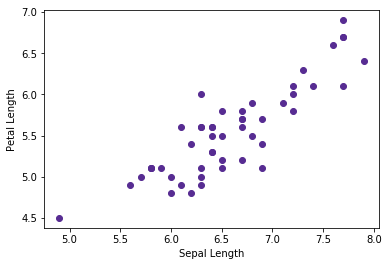

In [32]:
plt.plot(virginica['sepal_length'], virginica['petal_length'], 'o')
plt.ylabel('Petal Length')
plt.xlabel('Sepal Length')
plt.show()

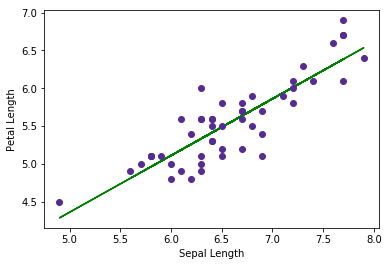

In [33]:
linear_regression = linreg().fit(virginica['sepal_length'].values.reshape(-1,1), virginica['petal_length'].values.reshape(-1,1))
predicted_petal_length = linear_regression.predict(virginica['sepal_length'].values.reshape(-1,1))
plt.plot(virginica['sepal_length'], predicted_petal_length, color='green')
plt.plot(virginica['sepal_length'], virginica['petal_length'], 'o')
plt.ylabel('Petal Length')
plt.xlabel('Sepal Length')
plt.show()

In [34]:
mean_squared_error = MSE(virginica['petal_length'], predicted_petal_length)
r2_score = r2(virginica['petal_length'], predicted_petal_length)
print('Mean Squared Error is equal to:', mean_squared_error)
print('R2 Score is equal to:', r2_score)

Mean Squared Error is equal to: 0.07555399741581202
R2 Score is equal to: 0.746884389017568


** Classification **

In [35]:
iris_dataset = load_iris()

In [36]:
classifier = KN(n_neighbors = 5)
training_data, validation_data, training_labels, validation_labels = train_test_split(iris_dataset.data, iris_dataset.target, test_size = 0.2, random_state = 100)
classifier.fit(training_data, training_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Now we want to find out how accurate our model is.

In [37]:
y_true = validation_labels
y_pred = classifier.predict(validation_data)
f1 = f1_score(y_true, y_pred, average='micro')  
target_names = iris_dataset.target_names
print('F1 Score' ,f1)
print('-----------')
print('Confusion Matrix')
print(confusion_matrix(y_true, y_pred))
print('-----------')
print('Classification Report')
print(classification_report(y_true, y_pred, target_names=target_names))

F1 Score 1.0
-----------
Confusion Matrix
[[11  0  0]
 [ 0  6  0]
 [ 0  0 13]]
-----------
Classification Report
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        11
 versicolor       1.00      1.00      1.00         6
  virginica       1.00      1.00      1.00        13

avg / total       1.00      1.00      1.00        30



Now let's see how the score changes as the n_neghibors changes.

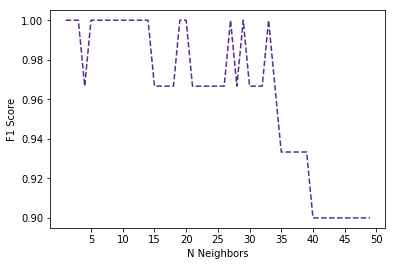

In [38]:
scores = []
for i in range(1, 50):
    classifier = KN(n_neighbors = i)
    classifier.fit(training_data, training_labels)
    scores.append(classifier.score(validation_data, validation_labels))
plt.plot(range(1,50), scores, linestyle='--')
plt.xlabel('N Neighbors')
plt.ylabel('F1 Score')
plt.xticks([5 * i for i in range(1,11)])
plt.show()

# Unsupervised Learning

** K-Means Clustering **

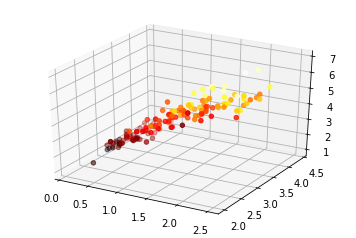

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = iris_dataset.data[:,3]
Y = iris_dataset.data[:,1]
Z = iris_dataset.data[:,2]
W = iris_dataset.data[:,0]
ax.scatter(X, Y, Z, c=W, cmap=plt.hot())

In [40]:
samples = iris_dataset.data

model = KM(n_clusters = 3)
model.fit(samples)
print(model.predict(samples))
print(iris_dataset.target)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [41]:
target = iris_dataset.target
species = np.chararray(target.shape, itemsize=150)
for i in range(len(samples)):
  if target[i] == 0:
    species[i] = 'setosa'
  elif target[i] == 1:
    species[i] = 'versicolor'
  elif target[i] == 2: 
    species[i] = 'virginica'
labels = model.predict(iris_dataset.data)
df = pd.DataFrame({'labels': labels, 'species': species})
ct = pd.crosstab(df['labels'], df['species'])
print(ct)

species  b'setosa'  b'versicolor'  b'virginica'
labels                                         
0                0              2            36
1               50              0             0
2                0             48            14


Finding best K:

[680.8244, 152.36870647733906, 78.94084142614602, 57.31787321428571, 46.53558205128205, 38.953730364980366, 34.32652991452992, 29.963345571095573, 28.244640892733]


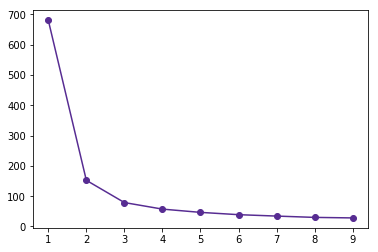

In [52]:
inertias = []
for i in range(1,10):
    model = KM(n_clusters = i)
    model.fit(samples)
    inertias.append(model.inertia_)
print(inertias)
plt.plot(range(1,10), inertias, '-o')
plt.show()